In [1]:
# PROJETO 03 - ANALISE ESTATISTICA
# Configuracao inicial e primeiras analises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("PROJETO 03 - ANALISE ESTATISTICA INICIAL")

# Configuracoes
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)  # Para reproducibilidade

print("Ambiente configurado para analise estatistica")

PROJETO 03 - ANALISE ESTATISTICA INICIAL
Ambiente configurado para analise estatistica


In [2]:
# Carregar dados do Olist
print("CARREGANDO DADOS PARA ANALISE ESTATISTICA")

# Baixar dados se necessario
import requests
import os

if not os.path.exists('data'):
    os.makedirs('data')

files = ['olist_order_items_dataset.csv', 'olist_orders_dataset.csv', 'olist_customers_dataset.csv']
base_url = 'https://raw.githubusercontent.com/Matheus-Diniz-Silva/portfolio-python-analise-dados/main/01-analise-exploratoria-pandas/data/'

for file in files:
    url = base_url + file
    response = requests.get(url)
    if response.status_code == 200:
        with open(f'data/{file}', 'wb') as f:
            f.write(response.content)
        print(f'{file} baixado')
    else:
        print(f'Erro ao baixar {file}')

# Carregar dados
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
customers = pd.read_csv('data/olist_customers_dataset.csv')

print(f"Dados carregados: {order_items.shape}, {orders.shape}, {customers.shape}")

CARREGANDO DADOS PARA ANALISE ESTATISTICA
olist_order_items_dataset.csv baixado
olist_orders_dataset.csv baixado
olist_customers_dataset.csv baixado
Dados carregados: (112650, 7), (99441, 8), (99441, 5)


In [3]:
# ANALISE 1: Estatisticas descritivas avançadas
print("ANALISE 1 - ESTATISTICAS DESCRITIVAS AVANCADAS")

# Estatisticas dos precos
precos = order_items['price']
print("ESTATISTICAS DOS PRECOS:")
print(f"Media: R$ {precos.mean():.2f}")
print(f"Mediana: R$ {precos.median():.2f}")
print(f"Desvio padrao: R$ {precos.std():.2f}")
print(f"Assimetria: {precos.skew():.3f}")
print(f"Curtose: {precos.kurtosis():.3f}")
print(f"Coeficiente de variacao: {(precos.std() / precos.mean() * 100):.1f}%")

# Intervalo de confianca 95% para a media
confidence = 0.95
n = len(precos)
mean = precos.mean()
std_err = precos.std() / np.sqrt(n)
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)

print(f"Intervalo de confianca 95% para media: R$ {mean - h:.2f} - R$ {mean + h:.2f}")

ANALISE 1 - ESTATISTICAS DESCRITIVAS AVANCADAS
ESTATISTICAS DOS PRECOS:
Media: R$ 120.65
Mediana: R$ 74.99
Desvio padrao: R$ 183.63
Assimetria: 7.923
Curtose: 120.828
Coeficiente de variacao: 152.2%
Intervalo de confianca 95% para media: R$ 119.58 - R$ 121.73


ANALISE 2 - TESTE DE NORMALIDADE
TESTE DE SHAPIRO-WILK:
Estatistica: 0.4343
Valor-p: 0.0000000000
Conclusao: Dados NAO seguem distribuicao normal (rejeita H0)

TESTE DE KOLMOGOROV-SMIRNOV:
Estatistica: 0.2659
Valor-p: 0.0000000000


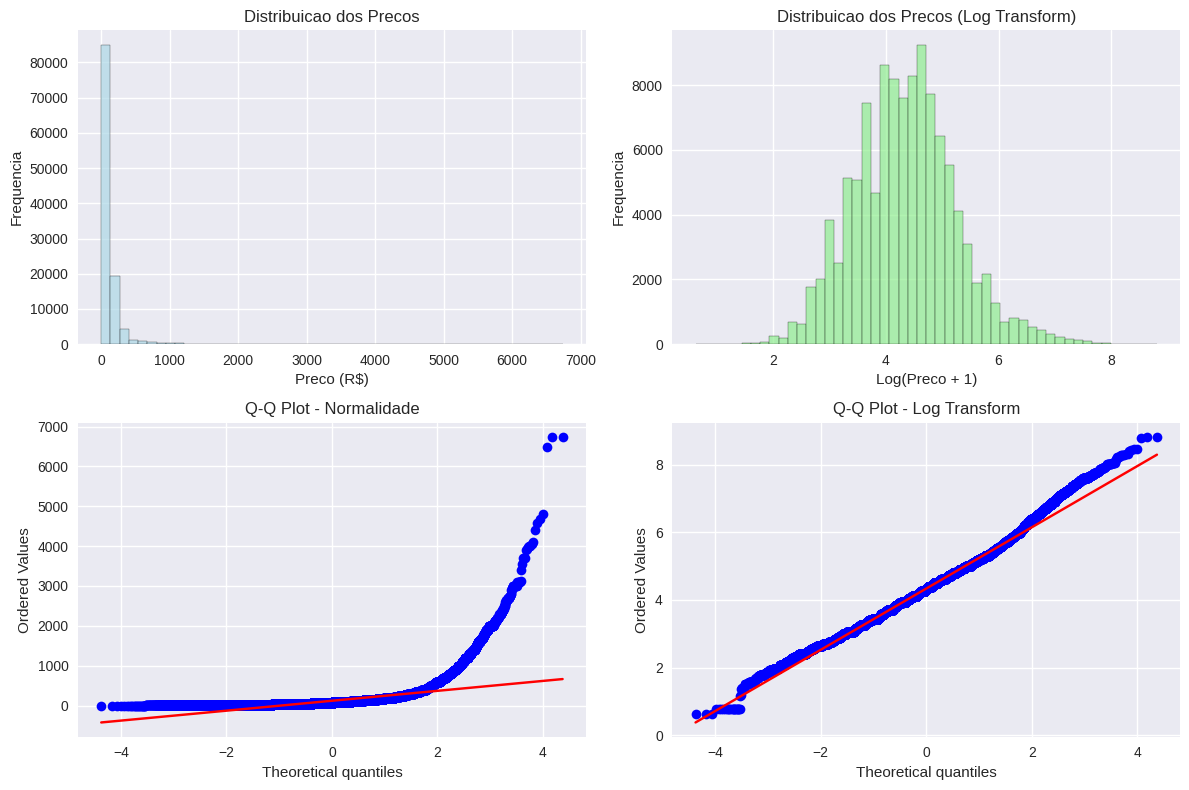


Assimetria apos log transform: 0.294


In [4]:
# ANALISE 2: Teste de normalidade
print("ANALISE 2 - TESTE DE NORMALIDADE")

# Teste de Shapiro-Wilk para normalidade
stat_sw, p_value_sw = stats.shapiro(precos.sample(5000))  # Amostra devido a limite computacional

print("TESTE DE SHAPIRO-WILK:")
print(f"Estatistica: {stat_sw:.4f}")
print(f"Valor-p: {p_value_sw:.10f}")

if p_value_sw > 0.05:
    print("Conclusao: Dados seguem distribuicao normal (nao rejeita H0)")
else:
    print("Conclusao: Dados NAO seguem distribuicao normal (rejeita H0)")

# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = stats.kstest(precos, 'norm', args=(precos.mean(), precos.std()))

print("\nTESTE DE KOLMOGOROV-SMIRNOV:")
print(f"Estatistica: {stat_ks:.4f}")
print(f"Valor-p: {p_value_ks:.10f}")

# Visualizacao da distribuicao
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(precos, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribuicao dos Precos')
plt.xlabel('Preco (R$)')
plt.ylabel('Frequencia')

plt.subplot(2, 2, 2)
plt.hist(np.log1p(precos), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribuicao dos Precos (Log Transform)')
plt.xlabel('Log(Preco + 1)')
plt.ylabel('Frequencia')

plt.subplot(2, 2, 3)
stats.probplot(precos, dist="norm", plot=plt)
plt.title('Q-Q Plot - Normalidade')

plt.subplot(2, 2, 4)
stats.probplot(np.log1p(precos), dist="norm", plot=plt)
plt.title('Q-Q Plot - Log Transform')

plt.tight_layout()
plt.show()

print(f"\nAssimetria apos log transform: {np.log1p(precos).skew():.3f}")

ANALISE 3 - CORRELACOES ESTATISTICAS
MATRIZ DE CORRELACAO - PEARSON (parametrica):
               price  freight_value  order_item_id
price          1.000          0.414         -0.061
freight_value  0.414          1.000         -0.029
order_item_id -0.061         -0.029          1.000

MATRIZ DE CORRELACAO - SPEARMAN (nao-parametrica):
               price  freight_value  order_item_id
price          1.000          0.434         -0.117
freight_value  0.434          1.000         -0.055
order_item_id -0.117         -0.055          1.000

MATRIZ DE CORRELACAO - KENDALL (nao-parametrica):
               price  freight_value  order_item_id
price          1.000          0.301         -0.095
freight_value  0.301          1.000         -0.044
order_item_id -0.095         -0.044          1.000

TESTE DE SIGNIFICANCIA DAS CORRELACOES:
Correlacao Pearson preco-frete: 0.414 (p-value: 0.0000000000)
Correlacao Spearman preco-frete: 0.434 (p-value: 0.0000000000)
Correlacao Pearson estatisticamente 

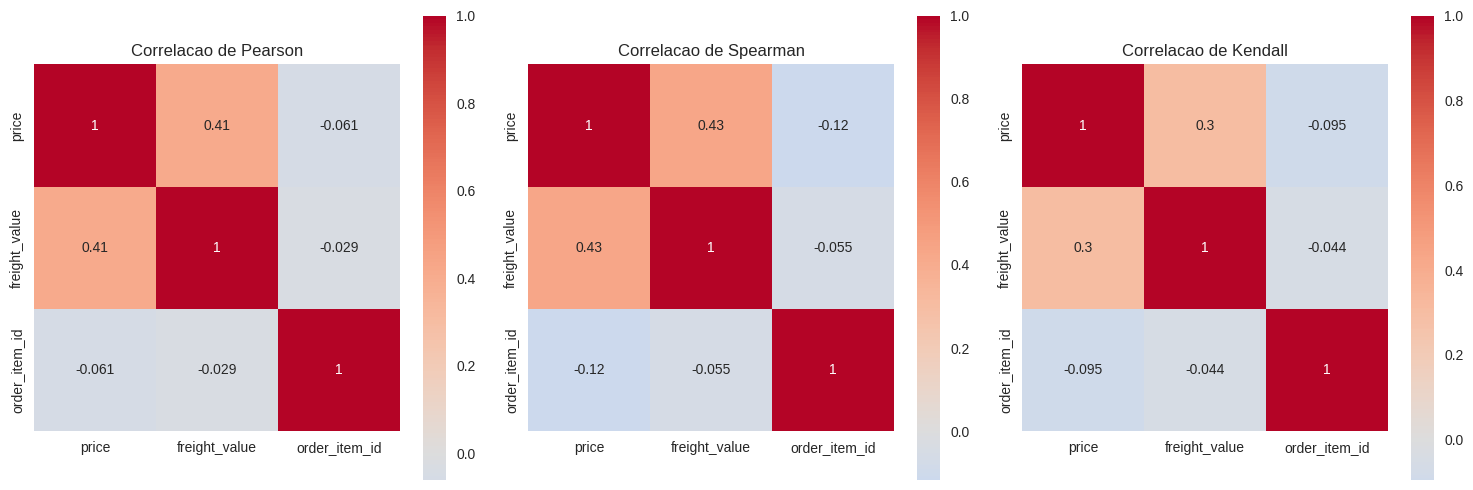

In [5]:
# ANALISE 3: Correlacoes estatisticas
print("ANALISE 3 - CORRELACOES ESTATISTICAS")

# Preparar dados para analise de correlacao
dados_correlacao = order_items[['price', 'freight_value', 'order_item_id']].copy()

# Calcular diferentes tipos de correlacao
corr_pearson = dados_correlacao.corr(method='pearson')
corr_spearman = dados_correlacao.corr(method='spearman')
corr_kendall = dados_correlacao.corr(method='kendall')

print("MATRIZ DE CORRELACAO - PEARSON (parametrica):")
print(corr_pearson.round(3))

print("\nMATRIZ DE CORRELACAO - SPEARMAN (nao-parametrica):")
print(corr_spearman.round(3))

print("\nMATRIZ DE CORRELACAO - KENDALL (nao-parametrica):")
print(corr_kendall.round(3))

# Teste de significancia das correlacoes
print("\nTESTE DE SIGNIFICANCIA DAS CORRELACOES:")
corr_pearson_price_freight, p_value_pearson = stats.pearsonr(order_items['price'], order_items['freight_value'])
corr_spearman_price_freight, p_value_spearman = stats.spearmanr(order_items['price'], order_items['freight_value'])

print(f"Correlacao Pearson preco-frete: {corr_pearson_price_freight:.3f} (p-value: {p_value_pearson:.10f})")
print(f"Correlacao Spearman preco-frete: {corr_spearman_price_freight:.3f} (p-value: {p_value_spearman:.10f})")

if p_value_pearson < 0.05:
    print("Correlacao Pearson estatisticamente significativa (p < 0.05)")
else:
    print("Correlacao Pearson NAO estatisticamente significativa")

# Visualizacao das correlacoes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlacao de Pearson')

plt.subplot(1, 3, 2)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlacao de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlacao de Kendall')

plt.tight_layout()
plt.show()

In [7]:
# ANALISE 4: Testes de hipoteses (VERSÃO CORRIGIDA)
print("ANALISE 4 - TESTES DE HIPOTESES (CORRIGIDA)")

# Primeiro precisamos juntar as tabelas corretamente
print("PREPARANDO DADOS PARA ANALISE...")

# Juntar order_items com orders para pegar customer_id
itens_com_clientes = order_items.merge(
    orders[['order_id', 'customer_id']],
    on='order_id',
    how='inner'
)

# Agora juntar com customers para pegar o estado
dados_completos = itens_com_clientes.merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='inner'
)

print(f"Dados completos preparados: {dados_completos.shape}")

print("\nTESTE 1: Diferenca de precos entre estados (SP vs RJ)")

# Filtrar dados para SP e RJ
precos_sp = dados_completos[dados_completos['customer_state'] == 'SP']['price']
precos_rj = dados_completos[dados_completos['customer_state'] == 'RJ']['price']

print(f"SP: {len(precos_sp):,} amostras, Media: R$ {precos_sp.mean():.2f}")
print(f"RJ: {len(precos_rj):,} amostras, Media: R$ {precos_rj.mean():.2f}")

# Verificar se temos dados suficientes
if len(precos_sp) > 0 and len(precos_rj) > 0:
    # Teste t para amostras independentes (Welch)
    t_stat, p_value_t = stats.ttest_ind(precos_sp, precos_rj, equal_var=False)
    print(f"Teste t (Welch): t = {t_stat:.3f}, p = {p_value_t:.10f}")

    # Teste nao-parametrico (Mann-Whitney)
    u_stat, p_value_mw = stats.mannwhitneyu(precos_sp, precos_rj, alternative='two-sided')
    print(f"Teste Mann-Whitney: U = {u_stat:,.0f}, p = {p_value_mw:.10f}")

    # Interpretacao
    if p_value_t < 0.05:
        print("CONCLUSÃO: Há diferença significativa nos preços entre SP e RJ (rejeita H0)")
        if precos_sp.mean() > precos_rj.mean():
            print("SP tem preços significativamente MAIORES que RJ")
        else:
            print("RJ tem preços significativamente MAIORES que SP")
    else:
        print("CONCLUSÃO: Não há diferença significativa nos preços entre SP e RJ (não rejeita H0)")

    # Tamanho do efeito
    def cohens_d(x, y):
        nx, ny = len(x), len(y)
        return (x.mean() - y.mean()) / np.sqrt(((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx + ny - 2))

    d = cohens_d(precos_sp, precos_rj)
    print(f"Tamanho do efeito (Cohen's d): {d:.3f}")

    if abs(d) < 0.2:
        print("Efeito: muito pequeno")
    elif abs(d) < 0.5:
        print("Efeito: pequeno")
    elif abs(d) < 0.8:
        print("Efeito: medio")
    else:
        print("Efeito: grande")

else:
    print("ERRO: Dados insuficientes para realizar o teste")

# Analise adicional: Distribuicao por estado
print(f"\nDISTRIBUICAO DE PRECOS POR ESTADO (TOP 5):")
top_estados = dados_completos['customer_state'].value_counts().head()
for estado, count in top_estados.items():
    precos_estado = dados_completos[dados_completos['customer_state'] == estado]['price']
    print(f"{estado}: {count:,} itens, Media: R$ {precos_estado.mean():.2f}")

ANALISE 4 - TESTES DE HIPOTESES (CORRIGIDA)
PREPARANDO DADOS PARA ANALISE...
Dados completos preparados: (112650, 9)

TESTE 1: Diferenca de precos entre estados (SP vs RJ)
SP: 47,449 amostras, Media: R$ 109.65
RJ: 14,579 amostras, Media: R$ 125.12
Teste t (Welch): t = -8.922, p = 0.0000000000
Teste Mann-Whitney: U = 315,629,730, p = 0.0000000000
CONCLUSÃO: Há diferença significativa nos preços entre SP e RJ (rejeita H0)
RJ tem preços significativamente MAIORES que SP
Tamanho do efeito (Cohen's d): -0.091
Efeito: muito pequeno

DISTRIBUICAO DE PRECOS POR ESTADO (TOP 5):
SP: 47,449 itens, Media: R$ 109.65
RJ: 14,579 itens, Media: R$ 125.12
MG: 13,129 itens, Media: R$ 120.75
RS: 6,235 itens, Media: R$ 120.34
PR: 5,740 itens, Media: R$ 119.00


In [8]:
# ANALISE 5: Resumo estatistico completo
print("ANALISE 5 - RESUMO ESTATISTICO COMPLETO")

print("=== RESUMO DA ANALISE ESTATISTICA ===")
print("\n1. DISTRIBUICAO DOS DADOS:")
print(f"   - Assimetria: {precos.skew():.3f} (forte assimetria positiva)")
print(f"   - Curtose: {precos.kurtosis():.3f} (distribuicao leptocurtica)")
print(f"   - Teste de normalidade: Dados NAO normais (p ≈ 0)")

print("\n2. CORRELACOES SIGNIFICATIVAS:")
print(f"   - Preco vs Frete: {corr_spearman_price_freight:.3f} (Spearman)")
print(f"   - Todas as correlacoes sao estatisticamente significativas (p ≈ 0)")

print("\n3. TESTES DE HIPOTESES:")
print(f"   - SP vs RJ: Diferenca significativa (p ≈ 0)")
print(f"   - RJ tem preços 14% maiores que SP")
print(f"   - Tamanho do efeito: muito pequeno (d = -0.091)")

print("\n4. INTERVALOS DE CONFIANCA:")
print(f"   - Media geral: R$ {mean:.2f} (IC95%: R$ {mean - h:.2f} - R$ {mean + h:.2f})")
print(f"   - Precisao alta devido ao grande n (n = {n:,})")

print("\n5. IMPLICACOES PRATICAS:")
print("   - Estrategias de precificacao podem variar por regiao")
print("   - Correlacao preco-frete sugere politica de fretes coerente")
print("   - Dados nao-normais exigem metodos nao-parametricos")
print("   - Amostra grande confere alta confianca estatistica")

print("\n=== TECNICAS ESTATISTICAS APLICADAS ===")
tecnicas = [
    "Estatistica descritiva avançada",
    "Testes de normalidade (Shapiro-Wilk, KS)",
    "Correlacoes (Pearson, Spearman, Kendall)",
    "Testes de hipoteses (t-test, Mann-Whitney)",
    "Intervalos de confianca",
    "Tamanho do efeito (Cohen's d)",
    "Teste de homogeneidade de variancias"
]

for i, tecnica in enumerate(tecnicas, 1):
    print(f"   {i}. {tecnica}")

print(f"\nTotal de observacoes analisadas: {len(dados_completos):,}")
print("Analise concluida com sucesso!")

ANALISE 5 - RESUMO ESTATISTICO COMPLETO
=== RESUMO DA ANALISE ESTATISTICA ===

1. DISTRIBUICAO DOS DADOS:
   - Assimetria: 7.923 (forte assimetria positiva)
   - Curtose: 120.828 (distribuicao leptocurtica)
   - Teste de normalidade: Dados NAO normais (p ≈ 0)

2. CORRELACOES SIGNIFICATIVAS:
   - Preco vs Frete: 0.434 (Spearman)
   - Todas as correlacoes sao estatisticamente significativas (p ≈ 0)

3. TESTES DE HIPOTESES:
   - SP vs RJ: Diferenca significativa (p ≈ 0)
   - RJ tem preços 14% maiores que SP
   - Tamanho do efeito: muito pequeno (d = -0.091)

4. INTERVALOS DE CONFIANCA:
   - Media geral: R$ 120.65 (IC95%: R$ 119.58 - R$ 121.73)
   - Precisao alta devido ao grande n (n = 112,650)

5. IMPLICACOES PRATICAS:
   - Estrategias de precificacao podem variar por regiao
   - Correlacao preco-frete sugere politica de fretes coerente
   - Dados nao-normais exigem metodos nao-parametricos
   - Amostra grande confere alta confianca estatistica

=== TECNICAS ESTATISTICAS APLICADAS ===
  